In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
filename = '/Users/ola/dev/eit/data/valid/stopsign/48.jpg'
img = cv2.imread(filename, cv2.IMREAD_COLOR)
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [3]:
template = '/Users/ola/dev/eit/data/templates/stop_template2.jpg'
template_img = cv2.imread(template, cv2.IMREAD_COLOR)
template_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
template_rgb = cv2.cvtColor(template_img, cv2.COLOR_BGR2RGB)

In [4]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel = np.ones((5,5),np.float32)/25
img_blurred = cv2.filter2D(img,-1,kernel)
RGB_blurred = cv2.cvtColor(img_blurred, cv2.COLOR_BGR2RGB)
img_blurred2 = cv2.blur(img, (3,3))
RGB_blurred2 = cv2.cvtColor(img_blurred2, cv2.COLOR_BGR2RGB)

In [5]:
rgb = RGB_img/255.0 # Convert to floating-point to prevent overflow
# Compute distance in RGB space to strong red
difference = rgb - np.array([1.0,0.0,0.0])
distance = np.linalg.norm(difference, axis=2) # Euclidean length (L2 norm)of the third dimension (rgb difference)
thresholded = distance < 0.7 # Isolate pixels that are sufficiently close to strong red

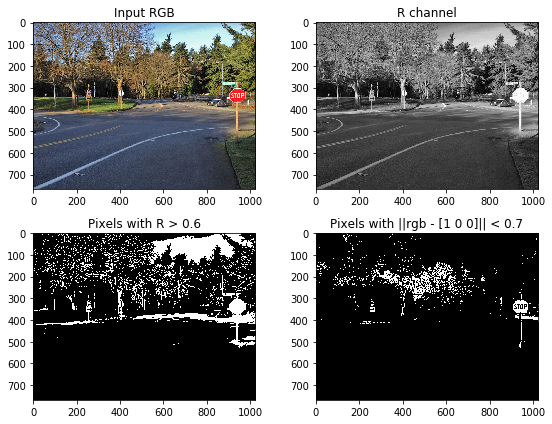

In [6]:
plt.figure(figsize=(8,6))
plt.subplot(221)
plt.imshow(rgb)
plt.title('Input RGB')
plt.subplot(222)
plt.imshow(rgb[:,:,0], cmap='gray')
plt.title('R channel')
plt.subplot(223)
plt.imshow(rgb[:,:,0] > 0.6, cmap='gray')
plt.title('Pixels with R > 0.6')
plt.subplot(224)
plt.imshow(thresholded, cmap='gray')
plt.title('Pixels with ||rgb - [1 0 0]|| < 0.7')
plt.tight_layout()
plt.show()

In [7]:
hsv = cv2.cvtColor(img_blurred, cv2.COLOR_BGR2HSV)
hls = cv2.cvtColor(img_blurred, cv2.COLOR_BGR2HLS)

low_red1 = np.array([161, 145, 20])
high_red1 = np.array([179, 255, 255])
red_mask1 = cv2.inRange(hsv, low_red1, high_red1)

low_red2 = np.array([0, 145, 50])
high_red2 = np.array([21, 255, 255])
red_mask2 = cv2.inRange(hsv, low_red2, high_red2)

low_red3 = np.array([161, 20, 125])
high_red3 = np.array([179, 155, 255])
red_mask3 = cv2.inRange(hls, low_red3, high_red3)

low_red4 = np.array([0, 50, 125])
high_red4 = np.array([21, 155, 255])
red_mask4 = cv2.inRange(hls, low_red4, high_red4)

red_hsv = red_mask1
red_hsv[np.where(red_mask2 > 0)] = 255

red_hls = red_mask3
red_hls[np.where(red_mask4 > 0)] = 255

red_mask = red_hsv
red_mask[np.where(red_hls > 0)] = 255


low_white = np.array([0, 0, 0])
high_white = np.array([180, 30, 255])
white_mask = cv2.inRange(hsv, low_white, high_white)

lower_gray = np.array([0, 5, 50], np.uint8)
upper_gray = np.array([179, 50, 255], np.uint8)
mask_gray = cv2.inRange(hsv, lower_gray, upper_gray)
img_res = cv2.bitwise_and(img, img, mask = mask_gray)

In [8]:
#print(np.where(thresholded == True))
rgb = RGB_img/255.0 # Convert to floating-point to prevent overflow
# Compute distance in RGB space to strong red
difference = rgb - np.array([1.0,0.0,0.0])
distance = np.linalg.norm(difference, axis=2) # Euclidean length (L2 norm)of the third dimension (rgb difference)
thresholded = distance < 0.7 # Isolate pixels that are sufficiently close to strong red
thresholded = thresholded * 255

red_mask[np.where(thresholded > 0)] = 255


In [9]:
img_red_cnt = cv2.imread(filename, cv2.IMREAD_COLOR)
ret, thresh = cv2.threshold(red_mask, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    [x,y,w,h] = cv2.boundingRect(cnt)
    w_n = w / np.sqrt(w**2 + h**2)
    h_n = h / np.sqrt(w**2 + h**2)
    if (np.sqrt(w**2 + h**2) > 2):# and (np.sqrt(w_n**2 - h_n**2) < 0.8):
        #print("x: ", x, "y: ", y, "w: ", w-10, "h: ", h+8)
        #print("VARIANCE: ", np.var(img_blurred[y+2:y+h+10,x:x+w-10,:], axis=1))
        #print((h+8)**2 + (w-10)**2)
        #print(img_blurred[y+2:y+h+10,x:x+w-10,:])
        plt.imshow(cv2.cvtColor(img_blurred[y+2:y+h+10,x:x+w-10,:], cv2.COLOR_BGR2RGB))
        cv2.rectangle(img_red_cnt ,(x-5,y-5),(x+w+5,y+h+5),(0,0,255),2)

error: OpenCV(4.2.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


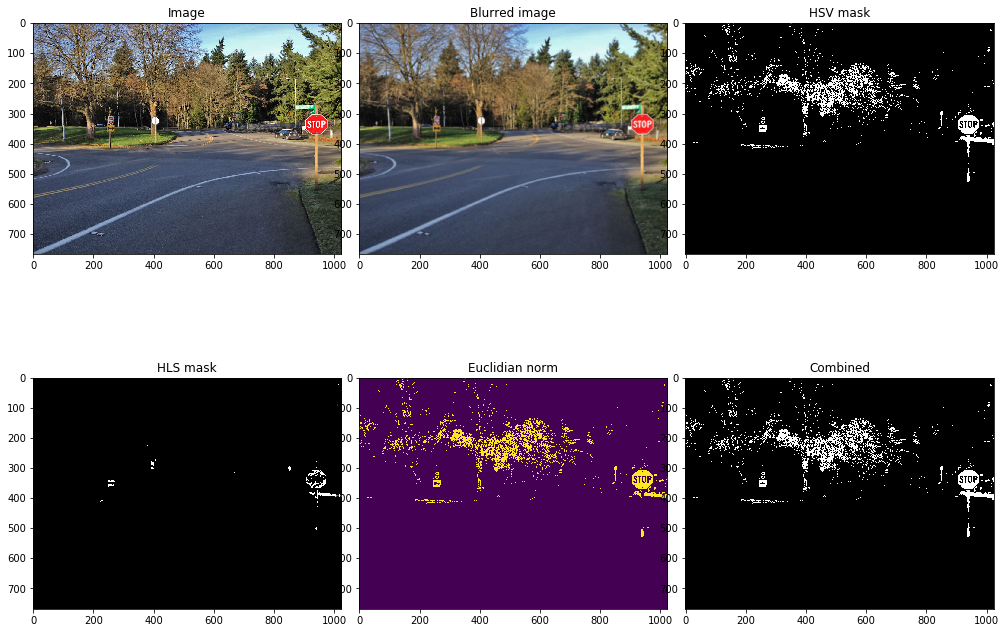

In [10]:
plt.figure(figsize=(14,10))
plt.subplot(231)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Image')
plt.tight_layout()
plt.subplot(232)
plt.imshow(cv2.cvtColor(img_blurred, cv2.COLOR_BGR2RGB))
plt.title('Blurred image')
plt.subplot(233)
plt.imshow(cv2.cvtColor(red_hsv, cv2.COLOR_BGR2RGB))
plt.title('HSV mask')
plt.subplot(234)
plt.imshow(cv2.cvtColor(red_hls, cv2.COLOR_BGR2RGB))
plt.title('HLS mask')
plt.subplot(235)
plt.imshow(thresholded)
plt.title('Euclidian norm')
plt.subplot(236)
plt.imshow(cv2.cvtColor(red_mask, cv2.COLOR_BGR2RGB))
plt.title('Combined')
plt.show()

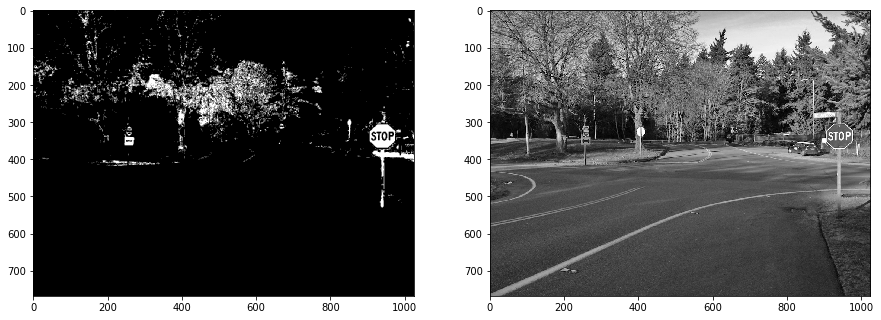

In [11]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
blurred_mask = cv2.blur(red_mask, (3,3))
plt.imshow(cv2.cvtColor(blurred_mask, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(imgray, cmap="gray")

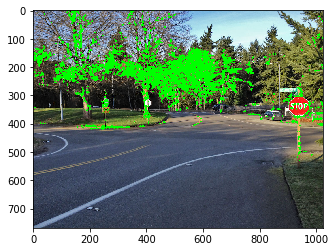

In [12]:
img_h = cv2.imread(filename)
gray_img_h = cv2.cvtColor(img_h, cv2.COLOR_BGR2GRAY)
gray_img_h = np.float32(gray_img_h)

dst = cv2.cornerHarris(blurred_mask, blockSize=2, ksize=3, k=0.04)

# dilate to mark the corners
dst = cv2.dilate(dst, None)
img_h[dst > 0.01 * dst.max()] = [0, 255, 0]

plt.imshow(cv2.cvtColor(img_h, cv2.COLOR_BGR2RGB))

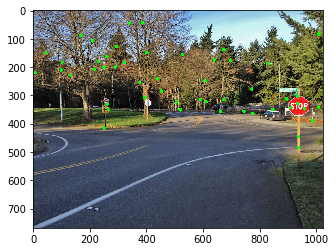

In [13]:
img_st = cv2.imread(filename)

corners = cv2.goodFeaturesToTrack(blurred_mask, maxCorners=50,      qualityLevel=0.02, minDistance=20)
corners = np.float32(corners)

for item in corners:
    x, y = item[0]
    cv2.circle(img_st, (x, y), 6, (0, 255, 0), -1)

#plt.imshow(cv2.cvtColor(blurred_mask, cv2.COLOR_BGR2RGB))
plt.imshow(cv2.cvtColor(img_st, cv2.COLOR_BGR2RGB))
plt.show()

In [14]:
def orb(template, img):
    orb = cv2.ORB_create()

    kp1, des1 = orb.detectAndCompute(template, None)
    kp2, des2 = orb.detectAndCompute(img, None)

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key = lambda x:x.distance)
    matches = [i for i in matches if i.distance < 60]
    
    if len(matches) >= 5:
        img3 = cv2.drawMatches(template,kp1,img,kp2,matches[:50],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
        return img3
    plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))

    return matches

In [15]:
matches = orb(template_gray, imgray)
#print(matches)
print(len(matches))
print([i.distance for i in matches])


768


AttributeError: 'numpy.ndarray' object has no attribute 'distance'

In [16]:
img_m = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
template_m = cv2.imread(template, cv2.IMREAD_GRAYSCALE)
blurred_mask = cv2.blur(red_mask, (3,3))
ret, thresh = cv2.threshold(red_mask, 127, 255, 0)
contours, hierarchy = cv2.findContours(red_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

circles = []
for cnt in contours:
    [x,y,w,h] = cv2.boundingRect(cnt)
    area = cv2.contourArea(cnt) 

    #if (np.square(w**2 - h**2) < 50) and (area > 100):
    if area > 200:
        print(area)
        cropped = img_m[y:y+h, x:x+w]
        matches = orb(template_m, img_m)

        cv2.rectangle(img_m, (x, y), (x+w, y+h),(0,0,255),2)

#plt.imshow(cv2.cvtColor(img_m, cv2.COLOR_BGR2RGB))
plt.show()

252.0
1752.0
527.5
3481.5
203.0
516.5
355.0
235.5
357.0
2580.0
11756.0


float64
uint8


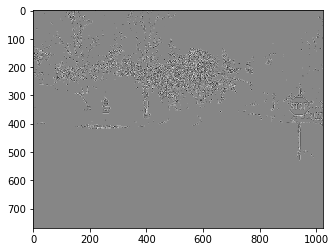

In [17]:
img_h = cv2.imread(filename, cv2.IMREAD_COLOR)
laplacian = cv2.Laplacian(blurred_mask,cv2.CV_64F)
print(laplacian.dtype)
edges = cv2.Canny(blurred_mask,50,150,apertureSize = 3)
print(edges.dtype)

lines = cv2.HoughLines(edges,1,np.pi/180,200)

for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img_h,(x1,y1),(x2,y2),(0,0,255),2)

plt.imshow(laplacian,cmap = 'gray')

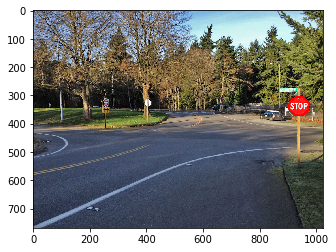

In [18]:
img_contours = cv2.imread(filename, cv2.IMREAD_COLOR)
for cnt in contours : 
    area = cv2.contourArea(cnt) 
   
    # Shortlisting the regions based on there area. 
    if area > 400:  
        approx = cv2.approxPolyDP(cnt, 0.009 * cv2.arcLength(cnt, True), True) 
        # Checking if the no. of sides of the selected region is 7. 
        if(len(approx) == 8):
            cv2.drawContours(img_contours, [approx], 0, (0, 0, 255), 5) 

img_contours = cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB)
hough_img = cv2.imread(filename, cv2.IMREAD_COLOR)
plt.imshow(img_contours)

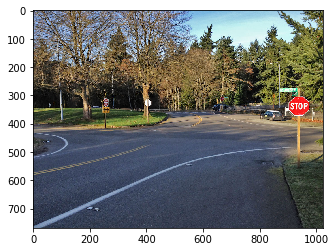

In [26]:
hough_gray = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
hough_img = cv2.imread(filename, cv2.IMREAD_COLOR)
edges = cv2.Canny(hough_gray,50,150,apertureSize = 3)
minLineLength = 10
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,20,minLineLength,maxLineGap)
for x1,y1,x2,y2 in lines[0]:
    cv2.line(hough_img,(x1,y1),(x2,y2),(0,255,0),2)


plt.imshow(cv2.cvtColor(hough_img, cv2.COLOR_BGR2RGB))
